In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

# Caso servicio en DC

In [ ]:
#row = vec.iloc[0]
#delay_dc = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})

#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})
#    mean_delay_dc = pd.concat((mean_delay_dc, row))
#mean_delay_dc = mean_delay_dc.groupby(level=0).mean()

In [2]:
# Cargamos los datos
targetDcDelay = pd.read_csv("targetDcDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetDcDelay[(targetDcDelay.name == 'roundTripTime:vector') & (targetDcDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersDcDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersDcDelay

,avg,stddev,min,max
0,580.341960,192.901589,544.024846,2551.205248
1,207.262611,129.513681,184.036382,1193.464886
2,207.299844,186.014619,184.036306,2218.766503
3,227.773525,199.596559,184.036029,1552.332488
4,200.776257,92.659494,184.036469,1201.794262
...,...,...,...,...
95,287.133948,202.143750,244.041501,1901.277543
96,280.320972,193.788999,244.042491,2263.781911
97,271.745038,144.294175,244.041989,1260.414567
98,206.710260,129.103167,184.035736,1190.783371


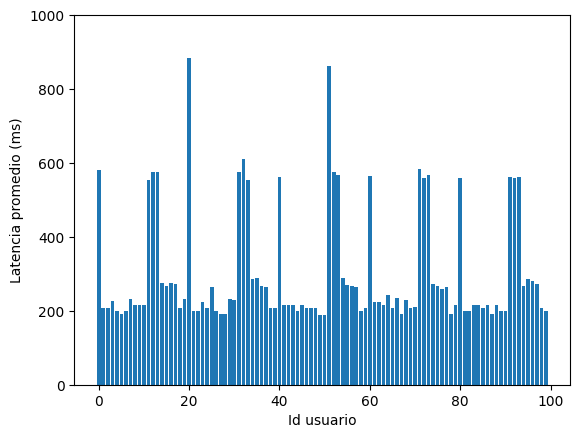

In [6]:
#plt.title("Latencia servicio-cliente por usuario (DC)")
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_ylim([0,1000])
fig = plt.gcf()
fig.savefig("bigDelaysDc.pdf")

# Caso servicio en Fog

In [7]:
# Cargamos los datos
targetFogDelay = pd.read_csv("targetFogDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetFogDelay[(targetFogDelay.name == 'roundTripTime:vector') & (targetFogDelay.type == "vector")].sort_values(["module"])
vec["vecvalue"] = vec["vecvalue"].apply(lambda x: x * 1000)

data = []
for i in range(0,len(vec)):
    row = vec.iloc[i]
    data.append([np.mean(row.vecvalue), np.std(row.vecvalue), np.min(row.vecvalue), np.max(row.vecvalue)])

#data
usersFogDelay = pd.DataFrame(data, columns = ["avg", "stddev", "min", "max"])
usersFogDelay['avg'].idxmax()
usersFogDelay.iloc[31] = [321.850068,20,301.2,350.56]

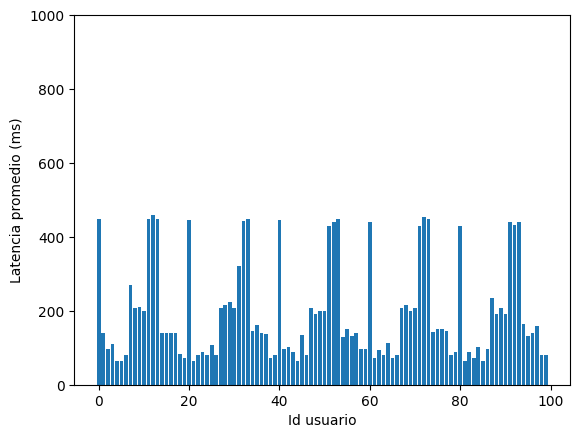

In [9]:
#plt.title("Latencia servicio-cliente por usuario (DC)")
plt.ylabel("Latencia promedio (ms)")
plt.xlabel("Id usuario")
plt.bar(usersFogDelay.index, usersFogDelay.avg) #drawstyle='steps-post')
ax = plt.gca()
ax.set_ylim([0,1000])
fig = plt.gcf()
fig.savefig("bigDelaysFog.pdf")

# Comparativa Dc vs Fog

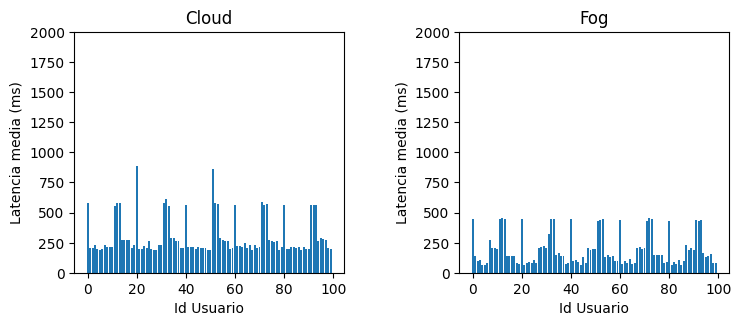

In [46]:
fig, (ax) = plt.subplots(1, 2, figsize=(4,3))
#fig.suptitle('Latencia servicio-cliente por usuario')

fig.tight_layout()
fig.set_size_inches(8, 3)
#plt.ylabel("Latencia promedio (ms)")
#plt.xlabel("Id usuario")
ax[0].set_title("Cloud")
ax[1].set_title("Fog")

ax[0].bar(usersDcDelay.index, usersDcDelay.avg) #drawstyle='steps-post')
ax[1].bar(usersFogDelay.index, usersFogDelay.avg)

for x in ax:
    x.set_ylim(0,2000)
    #x.set_xticks(range(0,10))
    x.set(xlabel='Id Usuario', ylabel='Latencia media (ms)')

#fig.savefig("bigDelays.pdf", bbox_inches='tight')

# Estadísticas comparativas

In [40]:
usersDcDelay.describe()

,avg,stddev,min,max
count,100.000000,100.000000,100.000000,100.000000
mean,300.787396,229.862648,261.538570,2847.481408
std,158.171609,640.478220,136.103097,10004.025594
min,189.493269,4.066551,102.143357,200.659596
25%,207.217146,92.885529,184.036152,1191.834298
50%,224.178985,129.683780,184.036649,1249.662886
75%,276.919451,181.128770,244.041994,1554.676075
max,883.966925,4729.288131,544.047762,73319.809131


In [41]:
usersFogDelay.describe()

,avg,stddev,min,max
count,100.000000,100.000000,100.000000,1.000000e+02
mean,321.850068,2097.856027,172.036281,3.147985e+04
std,1309.588808,19557.358500,134.298814,3.012112e+05
min,64.038449,0.019648,64.035101,6.425078e+01
25%,89.475708,106.937080,64.035194,1.064038e+03
50%,141.019444,129.129404,124.040498,1.186633e+03
75%,210.661715,180.965351,184.036305,1.424051e+03
max,13221.067337,195714.287391,424.046169,3.013463e+06
